Pretty good example I think I can build off of:
https://www.kaggle.com/code/elizabethmaciasphd/abalone-rings-multiple-linear-regression/input

In [2]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [3]:
file_path = '/kaggle/input/abalone/train.csv'
train_df = pd.read_csv(file_path)

In [4]:
train_df.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90615 entries, 0 to 90614
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              90615 non-null  int64  
 1   Sex             90615 non-null  object 
 2   Length          90615 non-null  float64
 3   Diameter        90615 non-null  float64
 4   Height          90615 non-null  float64
 5   Whole weight    90615 non-null  float64
 6   Whole weight.1  90615 non-null  float64
 7   Whole weight.2  90615 non-null  float64
 8   Shell weight    90615 non-null  float64
 9   Rings           90615 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 6.9+ MB


In [6]:
train_df.columns

Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Whole weight',
       'Whole weight.1', 'Whole weight.2', 'Shell weight', 'Rings'],
      dtype='object')

In [7]:
train_df.isna().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Whole weight.1    0
Whole weight.2    0
Shell weight      0
Rings             0
dtype: int64

In [8]:
train_df.describe()

,id,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
count,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000
mean,45307.000000,0.517098,0.401679,0.135464,0.789035,0.340778,0.169422,0.225898,9.696794
std,26158.441658,0.118217,0.098026,0.038008,0.457671,0.204428,0.100909,0.130203,3.176221
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,22653.500000,0.445000,0.345000,0.110000,0.419000,0.177500,0.086500,0.120000,8.000000
50%,45307.000000,0.545000,0.425000,0.140000,0.799500,0.330000,0.166000,0.225000,9.000000
75%,67960.500000,0.600000,0.470000,0.160000,1.067500,0.463000,0.232500,0.305000,11.000000
max,90614.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


(array([1.5000e+01, 1.4600e+02, 6.9500e+02, 1.4740e+03, 2.9070e+03,
        4.9880e+03, 8.6210e+03, 8.3300e+03, 1.1432e+04, 1.5444e+04,
        1.4920e+04, 1.0863e+04, 5.9250e+03, 3.4990e+03, 9.4900e+02,
        3.5100e+02, 4.0000e+01, 6.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([0.   , 0.015, 0.03 , 0.045, 0.06 , 0.075, 0.09 , 0.105, 0.12 ,
        0.135, 0.15 , 0.165, 0.18 , 0.195, 0.21 , 0.225, 0.24 , 0.255,
        0.27 , 0.285, 0.3  ]),
 <BarContainer object of 20 artists>)

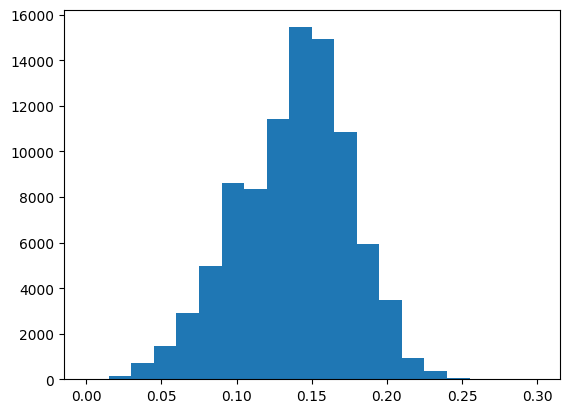

In [9]:
plt.hist(train_df.Height, range=[0.0, 0.3], bins=20)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Height', ylabel='Count'>

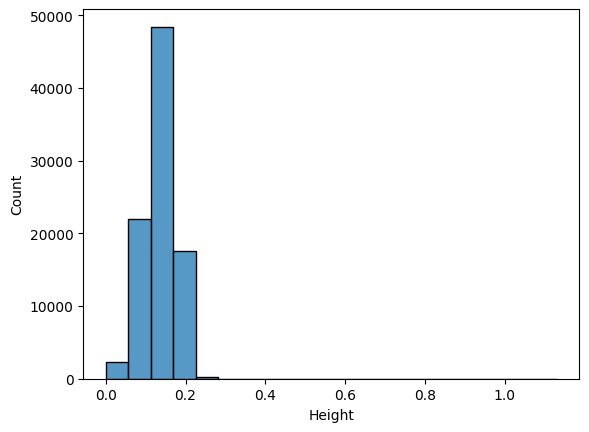

In [10]:
sns.histplot(train_df.Height, bins=20)

In [11]:
train_df.Sex.unique()

array(['F', 'I', 'M'], dtype=object)

In [12]:
f_selector = train_df.Sex == 'F'
m_selector = train_df.Sex == 'M'
i_selector = train_df.Sex == 'I'

In [13]:
train_df.Sex[f_selector]

0        F
1        F
5        F
7        F
12       F
        ..
90599    F
90600    F
90604    F
90607    F
90609    F
Name: Sex, Length: 26495, dtype: object

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Height', ylabel='Count'>

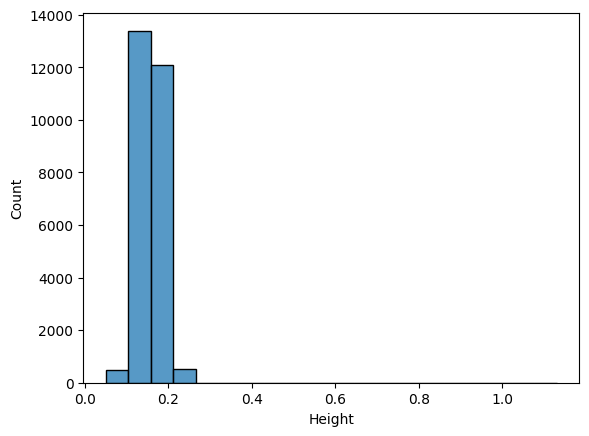

In [14]:
sns.histplot(train_df.Height[f_selector], bins=20)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Height', ylabel='Count'>

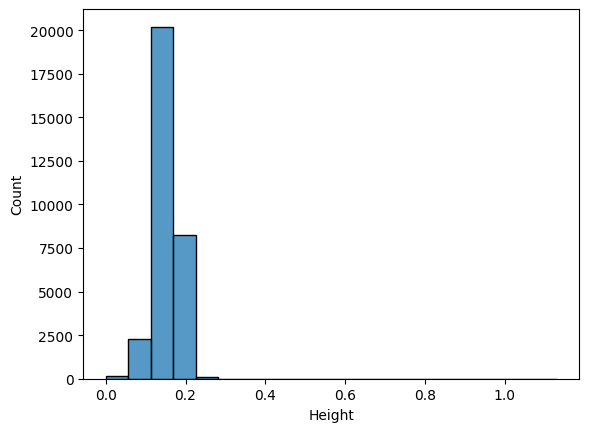

In [15]:
sns.histplot(train_df.Height[m_selector], bins=20)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Height', ylabel='Count'>

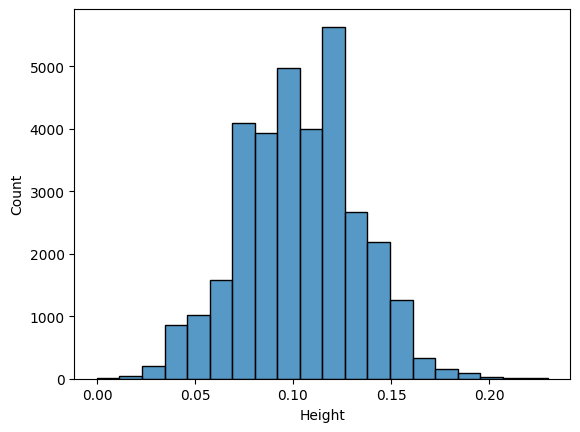

In [16]:
sns.histplot(train_df.Height[i_selector], bins=20)

Note how the height is affected by the sex

It will be interesting to see how correlated height and other measures are to rings, and then how the correlation changes when selecting by the sex.

In [17]:
train_df.Height[i_selector].count()

33093

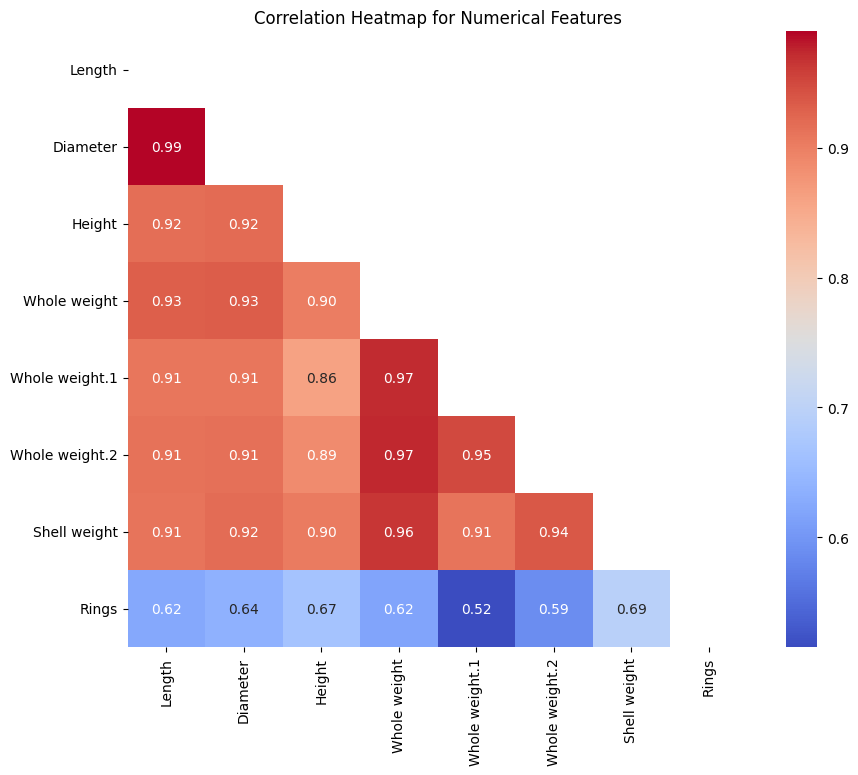

In [18]:
# Select only numerical features
numerical_features = ['Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1', 'Whole weight.2', 'Shell weight', 'Rings']

# Compute correlation matrix
correlation_matrix = train_df[numerical_features].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', mask=np.triu(correlation_matrix))
plt.title('Correlation Heatmap for Numerical Features')
plt.show()

In [19]:
i_height_df = train_df.Height[i_selector].to_frame().join(train_df.Rings[i_selector])
f_height_df = train_df.Height[f_selector].to_frame().join(train_df.Rings[f_selector])
m_height_df = train_df.Height[m_selector].to_frame().join(train_df.Rings[m_selector])
i_height_df.head()

,Height,Rings
2,0.025,6
4,0.130,9
8,0.040,4
9,0.125,8
13,0.110,7


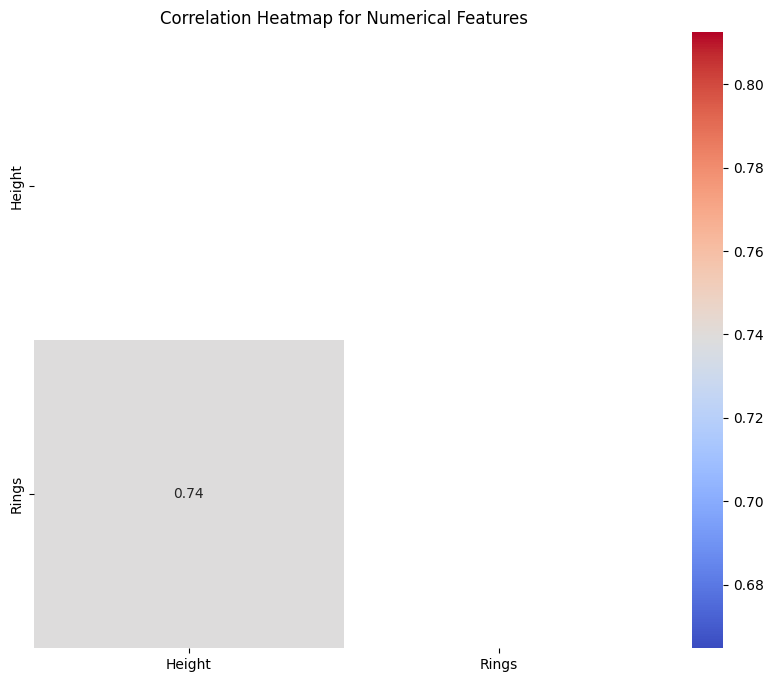

In [20]:
# Compute correlation matrix
correlation_matrix = i_height_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', mask=np.triu(correlation_matrix))
plt.title('Correlation Heatmap for Numerical Features')
plt.show()

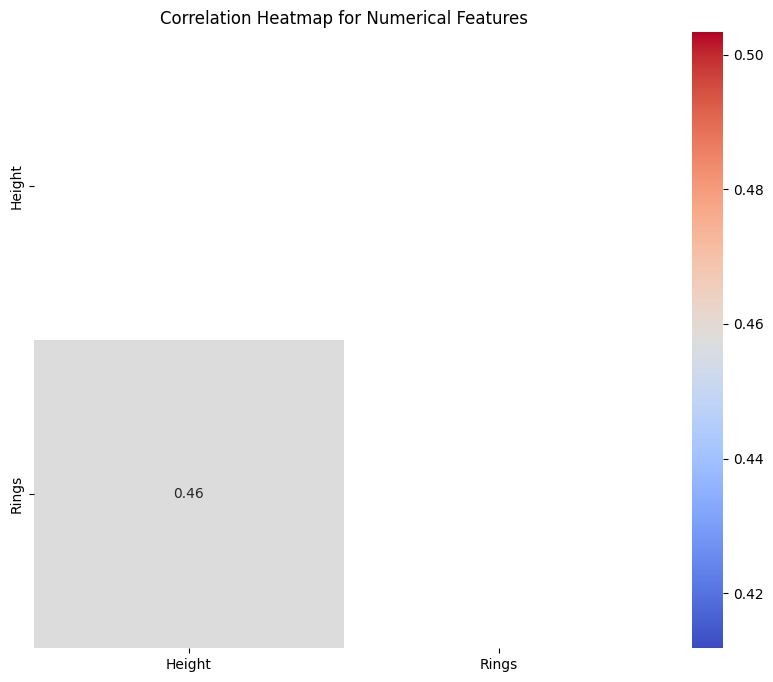

In [21]:
# Compute correlation matrix
correlation_matrix = m_height_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', mask=np.triu(correlation_matrix))
plt.title('Correlation Heatmap for Numerical Features')
plt.show()

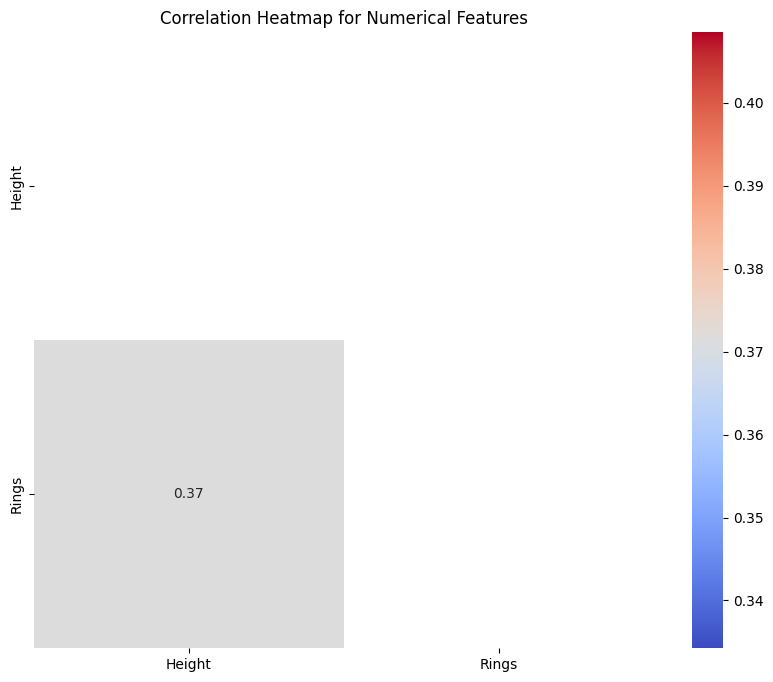

In [22]:
# Compute correlation matrix
correlation_matrix = f_height_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', mask=np.triu(correlation_matrix))
plt.title('Correlation Heatmap for Numerical Features')
plt.show()

Turns out that correlation doesn't change much for Height/Rings by sex.

In [23]:
def corrRingsByCategories(categories, feature, data):
    selected_dfs = []
    for category in categories:
        category_df = (data[feature][category].to_frame().join(data.Rings[category]))

        # Compute correlation matrix
        correlation_matrix = category_df.corr(method='spearman')

        # Plot the heatmap
        plt.figure(figsize=(10, 8))
        sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', mask=np.triu(correlation_matrix))
        plt.title('Correlation Heatmap for category')
        plt.show()

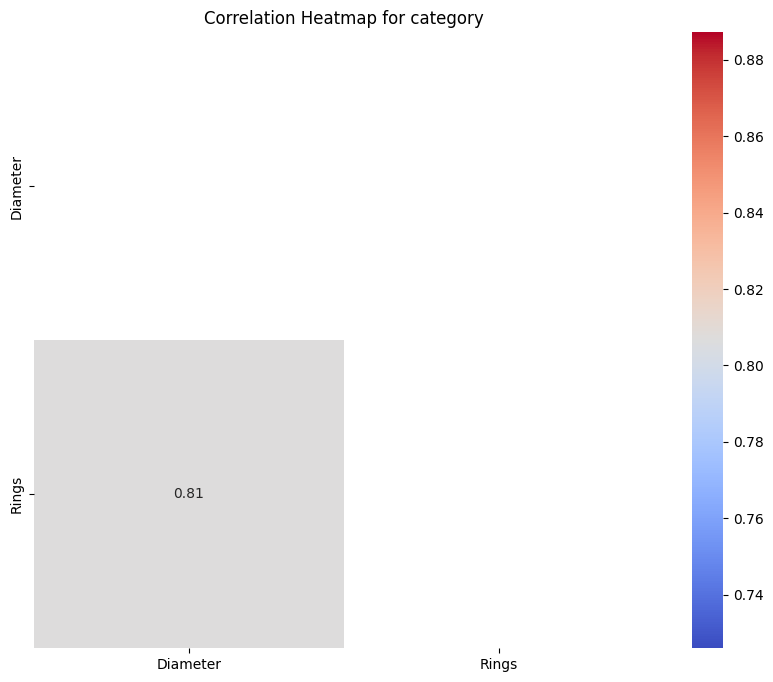

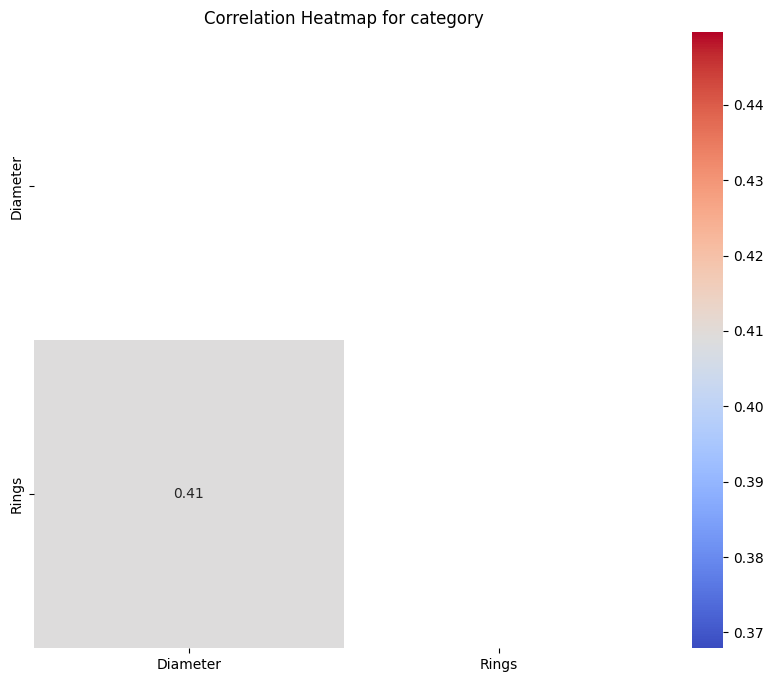

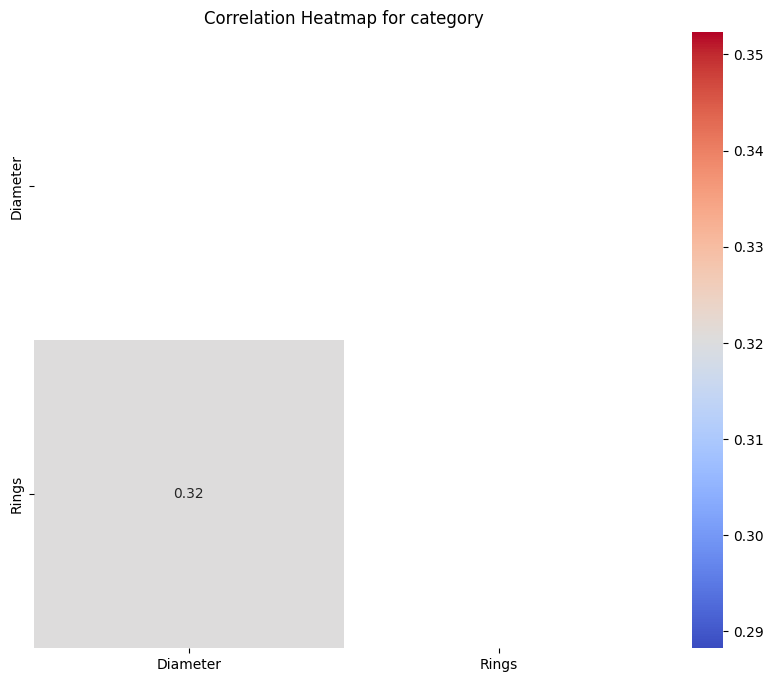

In [24]:
corrRingsByCategories([i_selector, m_selector, f_selector], 'Diameter', train_df)

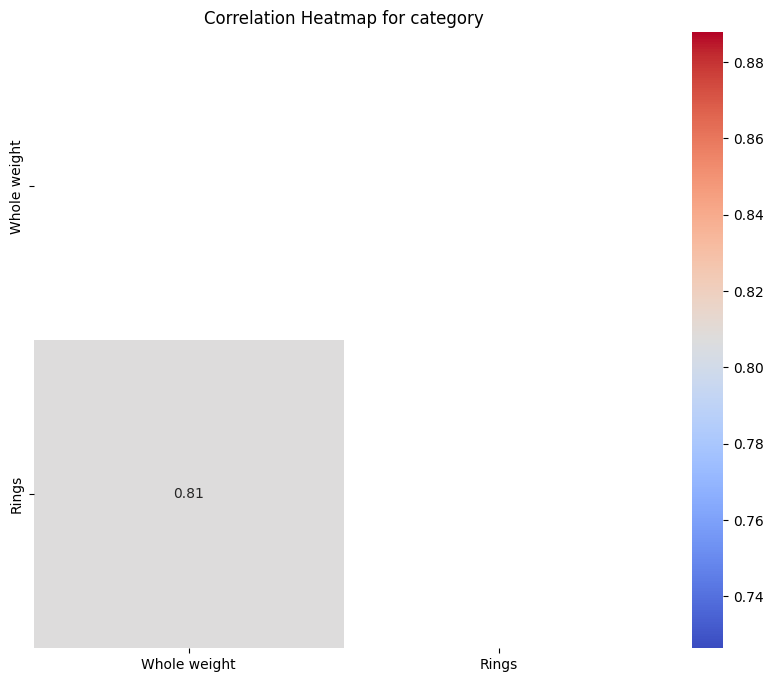

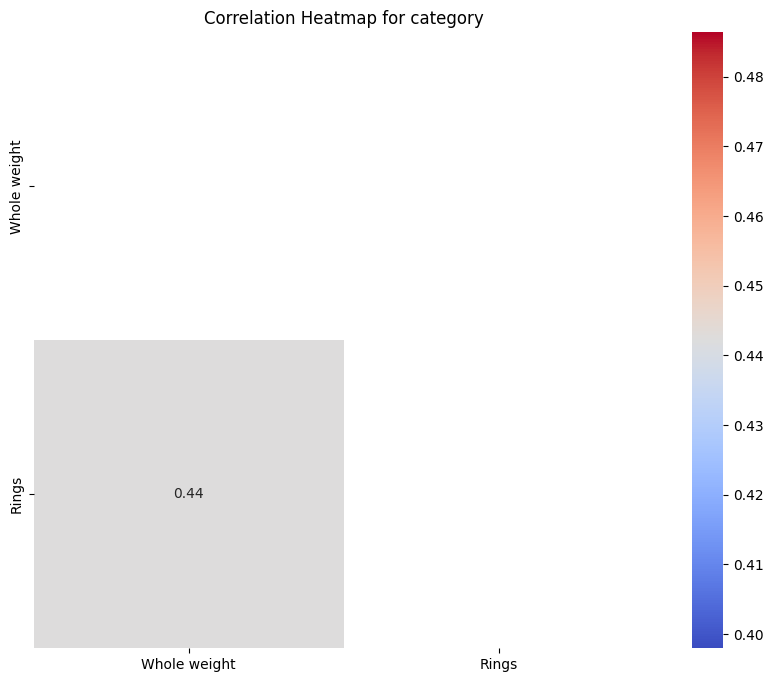

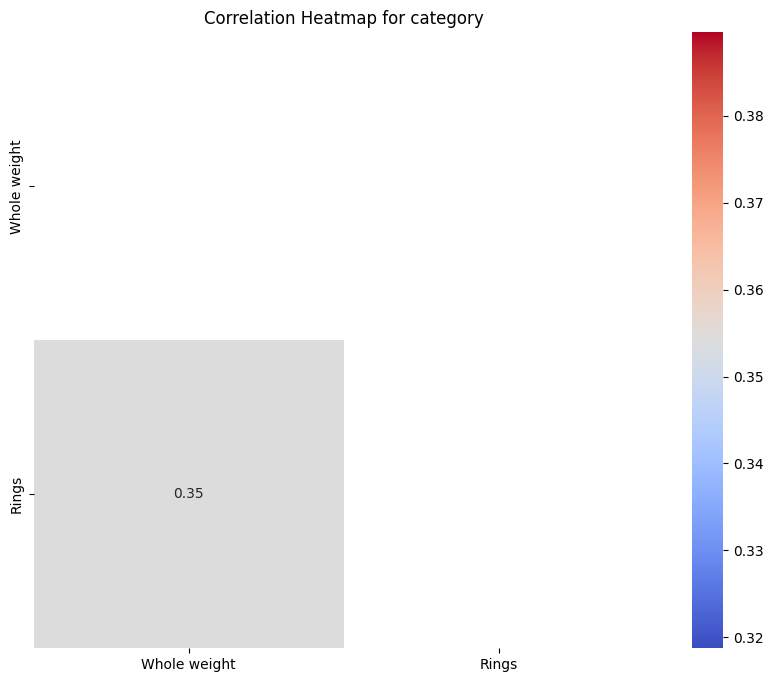

In [25]:
corrRingsByCategories([i_selector, m_selector, f_selector], 'Whole weight', train_df)

When I change the correlation to spearman I get a slightly better correlation, indicating that the relationship might not be linear...

Good, simple article on correlation:
https://data36.com/correlation-definition-calculation-corr-pandas/

In [26]:
train_df.Sex.unique()

array(['F', 'I', 'M'], dtype=object)

In [27]:
def corrByCategory(category, feature1, feature2, data):
    """
    Correlate to features (series) with respect to a category

    Parameters
    ----------
    category : string
        The name of the categorical series which will be used to subdivide the correlations
    feature1 : string
        The name of the first feature (column/series) to compare
    feature2 : string
        The name of the secord feature to compare
    data: DataFrame
        Contains all of the series represented by category, feature1, and feature2

    Returns
    -------
    No direct return.  
    Plots a (simple) heatmap showing the correlations for each feature, by category
    """
    
    # For the specifiec category, get all unique types
    categories = data[category].unique()

    # For each type/selection in the category determine the correlation
    for selection in categories:
        selector = data[category] == selection

        # Construct a dataframe consisting of the two things to compare
        category_df = (data[feature1][selector].to_frame().join(data[feature2][selector]))

        # Compute correlation using spearman to capture possible non-linearity
        correlation_matrix = category_df.corr(method='spearman')

        # Plot the heatmap
        titleString = 'Correlation between ' + feature1 + " and " + feature2 + " by " + category + ":" + selection
        plt.figure(figsize=(10, 8))
        sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', mask=np.triu(correlation_matrix))
        plt.title(titleString)
        plt.show()

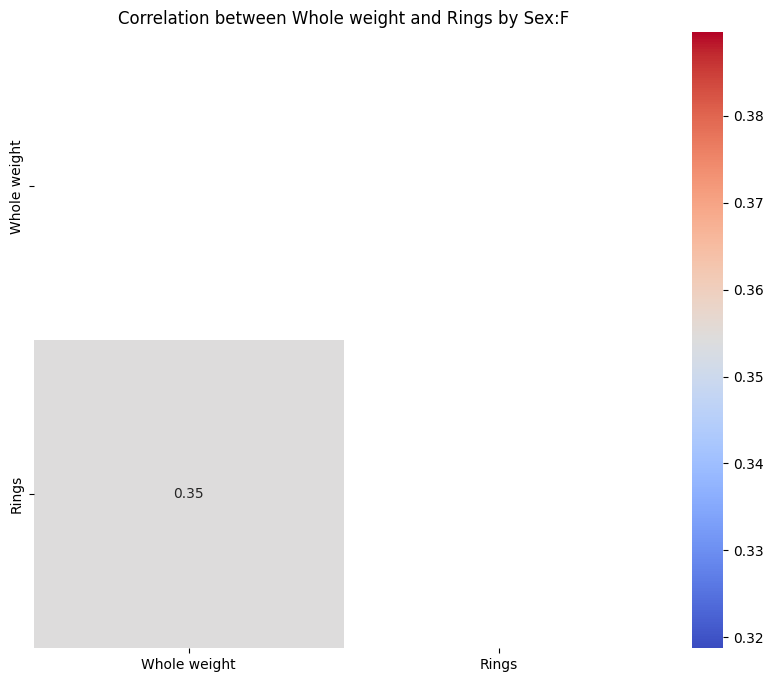

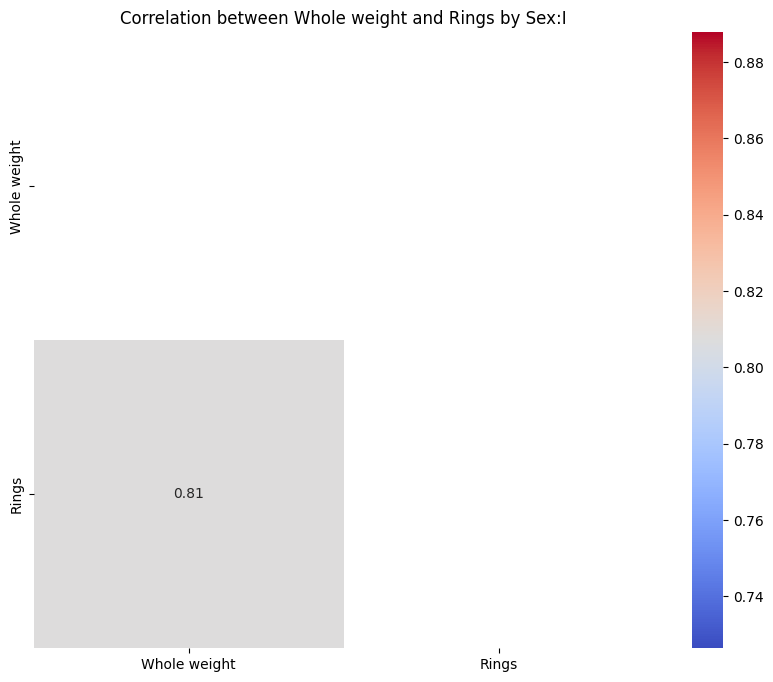

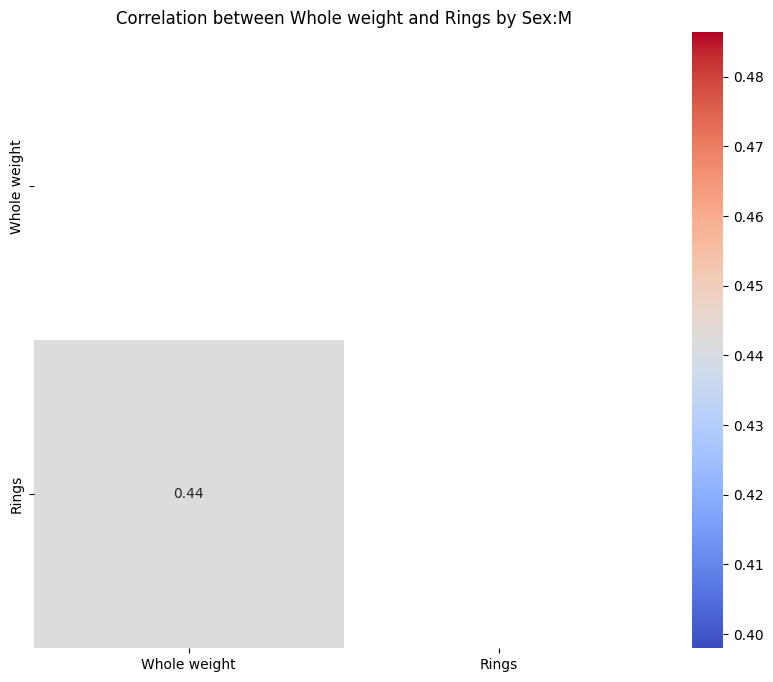

In [28]:
corrByCategory('Sex', 'Whole weight', 'Rings', train_df)

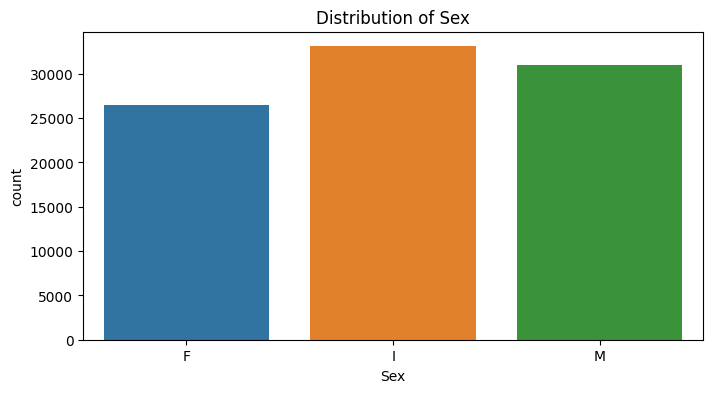

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


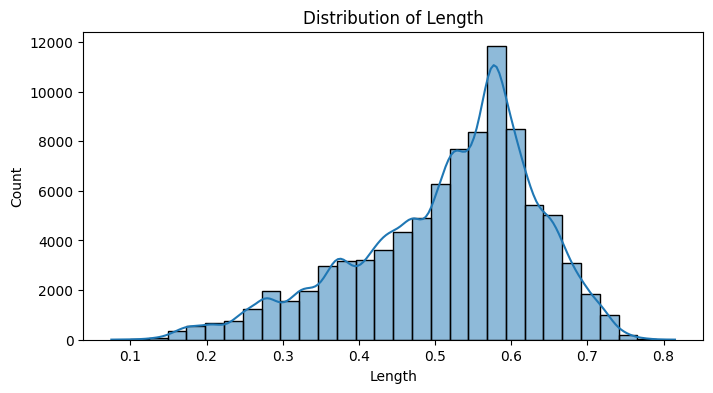

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


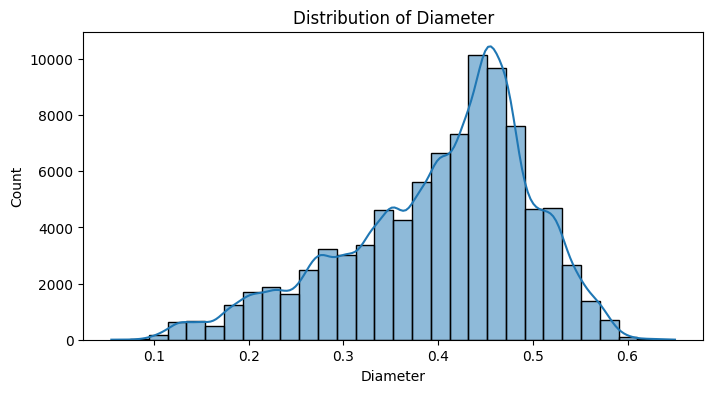

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


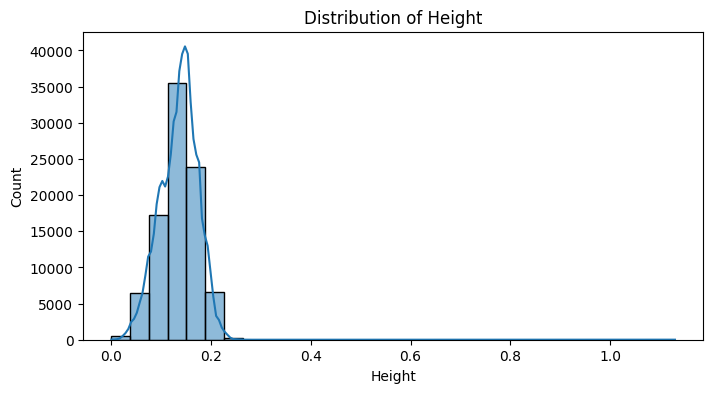

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


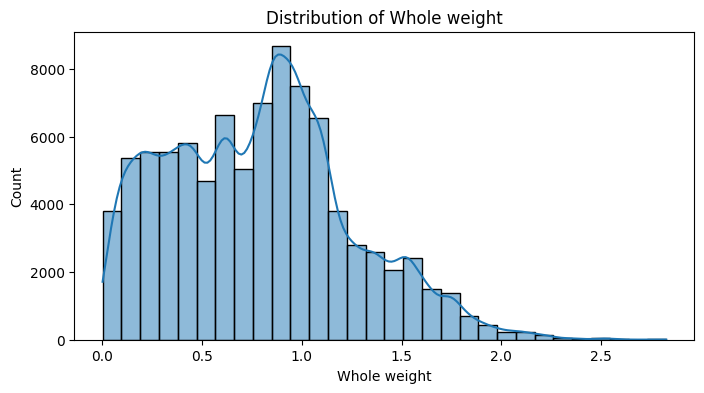

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


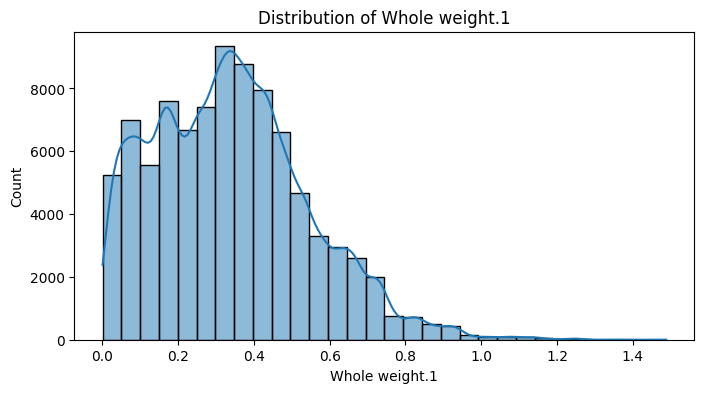

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


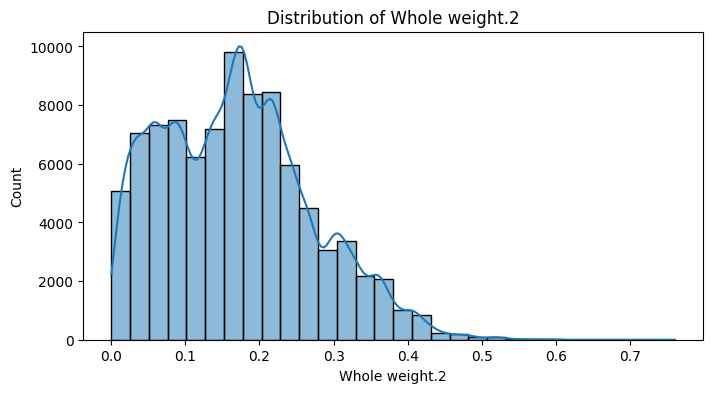

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


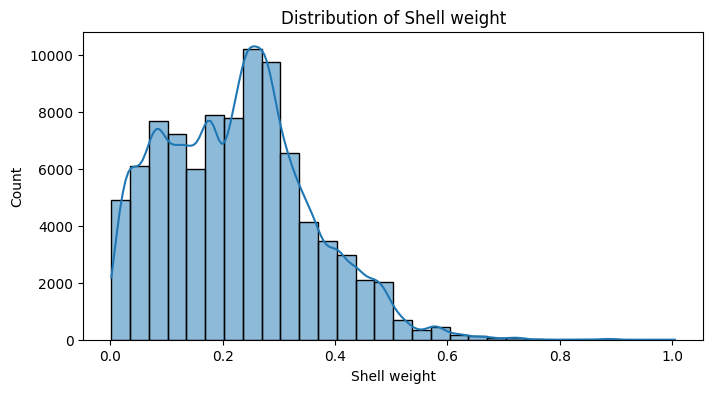

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


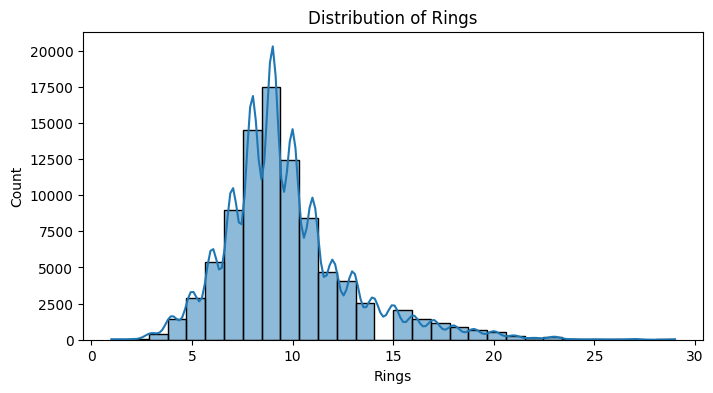

In [29]:
# Assuming df is your DataFrame
for column in (train_df.drop(['id'], axis=1)).columns:
    plt.figure(figsize=(8, 4))
    if train_df[column].dtype == 'object':  # Categorical features
        sns.countplot(x=column, data=train_df)
        plt.title(f'Distribution of {column}')
    else:  # Numerical features
        sns.histplot(train_df[column], kde=True, bins=30)
        plt.title(f'Distribution of {column}')
    plt.show()

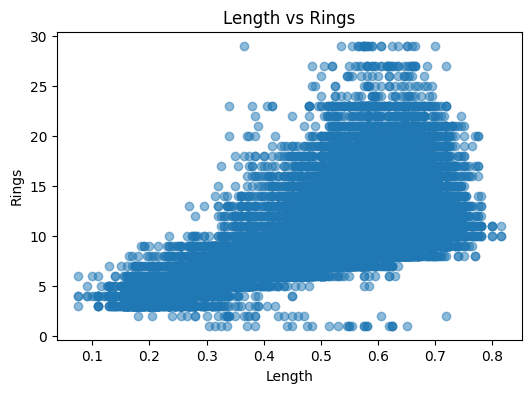

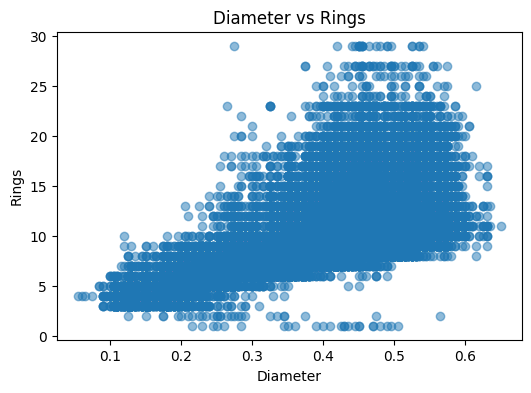

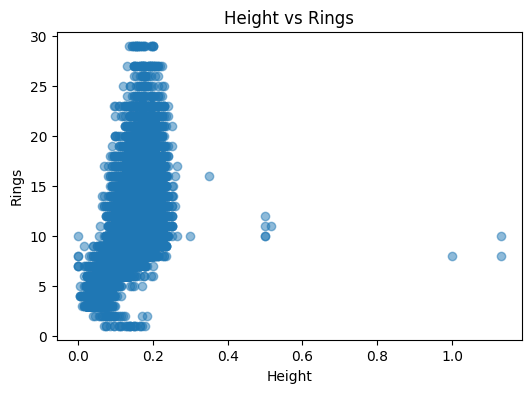

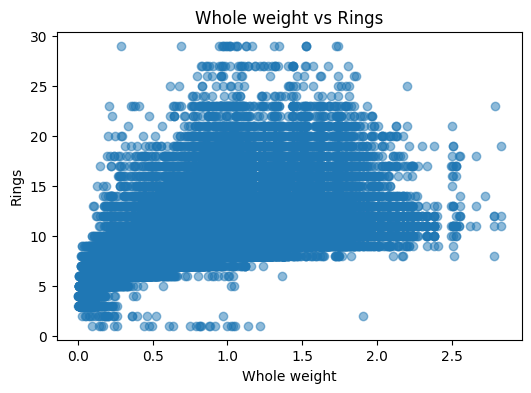

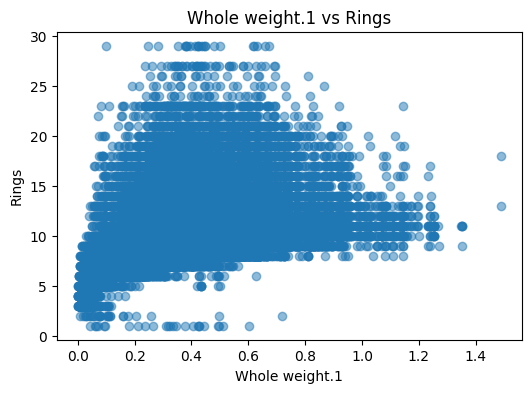

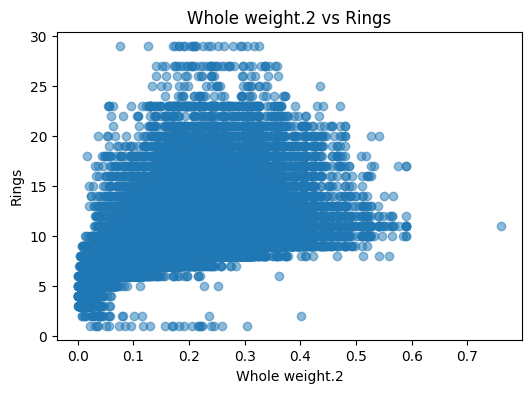

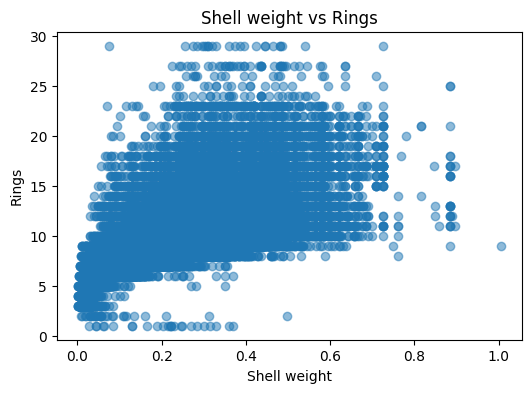

In [30]:
# List of numerical predictors
numerical_features = ['Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1', 'Whole weight.2', 'Shell weight']

# Create scatter plots
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    plt.scatter(train_df[feature], train_df['Rings'], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('Rings')
    plt.title(f'{feature} vs Rings')
    plt.show()